In [70]:
import matplotlib.pyplot as plt

In [71]:
file_path = r'C:\Users\dhutt\Desktop\SCHEDULING_MODEL\code\reworked_data_model\results\comparison.txt'
file = open(file_path, 'r')
content = file.readlines()

In [72]:
elitism_tournament = content[4:317]
random_selection = content[321:]

In [73]:
reformated_a = []
for result in elitism_tournament:
    values = result.split(';')
    reformated_a.append({'source': values[0], 'instance': int(values[1]), 'runtime': float(values[2]), 'fevals': int(values[3]), 'generations': int(values[4]), 'restarts': int(values[5]), 'fitness': int(values[6]), 'adjustment': True if values[7].startswith('True') else False})
reformated_b = []
for result in random_selection:
    values = result.split(';')
    reformated_b.append({'source': values[0], 'instance': int(values[1]), 'runtime': float(values[2]), 'fevals': int(values[3]), 'generations': int(values[4]), 'restarts': int(values[5]), 'fitness': int(values[6]), 'adjustment': True if values[7].startswith('True') else False})


In [74]:
def get_id(result):
    return f'{result["source"]}{result["instance"]}'

def add_result(result, data):
    if get_id(result) not in data:
        data[get_id(result)] = []
    data[get_id(result)].append(result)

a_divided = [dict(), dict()]
b_divided = [dict(), dict()]

for result in reformated_a:
    if result['adjustment']:
        add_result(result, a_divided[0])
    else:
        add_result(result, a_divided[1])

for result in reformated_b:
    if result['adjustment']:
        add_result(result, b_divided[0])
    else:
        add_result(result, b_divided[1])


In [75]:
def average(data, name):
    sum = 0
    count = 0
    for entry in data:
        for experiment in data[entry]:
            sum += experiment[name]
        count += len(data[entry])
    return sum / count

def average_per_instance(data, name):
    sum = 0
    for entry in data:
        sum += entry[name]
    return sum/len(data)

In [76]:
average_runtime = [average(b_divided[0], 'runtime'), average(b_divided[1], 'runtime')]
average_fevals = [average(b_divided[0], 'fevals'), average(b_divided[1], 'fevals')]


Text(0, 0.5, 'Time in seconds')

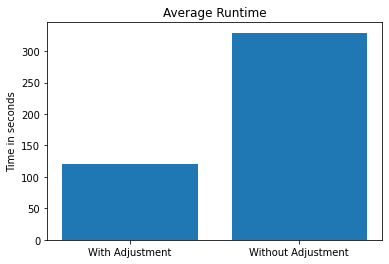

In [77]:
plt.bar(['With Adjustment', 'Without Adjustment'], average_runtime)
plt.title('Average Runtime')
plt.ylabel('Time in seconds')


Text(0, 0.5, 'Function Evaluations')

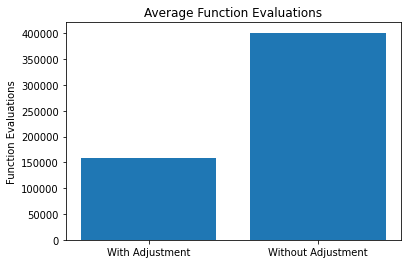

In [79]:
plt.bar(['With Adjustment', 'Without Adjustment'], average_fevals)
plt.title('Average Function Evaluations')
plt.ylabel('Function Evaluations')